In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Merge the 12 months of sales data into a single csv file

In [22]:
files = os.listdir("./SalesAnalysis/Sales_Data")
res_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./SalesAnalysis/Sales_Data/"+file)
    res_data = pd.concat([res_data, df])    

In [23]:
res_data.to_csv("res_data.csv", index=False)

In [24]:
res_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [25]:
res_data.dropna(inplace=True)

In [26]:
res_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

<Q1>What was the best month for sales? How much was earned that month?

In [27]:
res_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [28]:
res_data = res_data[res_data["Order Date"].str[:2] != "Or"]

In [36]:
res_data["Month"] = res_data["Order Date"].str[:2]

In [44]:
res_data["Quantity Ordered"] = pd.to_numeric(res_data["Quantity Ordered"])
res_data["Price Each"] = pd.to_numeric(res_data["Price Each"])

In [45]:
res_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
0,176558,USB-C Charging Cable,2,11.953125,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.906250,04
2,176559,Bose SoundSport Headphones,1,100.000000,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",100.000000,04
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.000000,04
4,176560,Wired Headphones,1,11.992188,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.992188,04
5,176561,Wired Headphones,1,11.992188,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.992188,04


In [46]:
res_data["Sales"] = res_data["Quantity Ordered"]*res_data["Price Each"]

In [127]:
results1 = res_data.groupby("Month").sum()

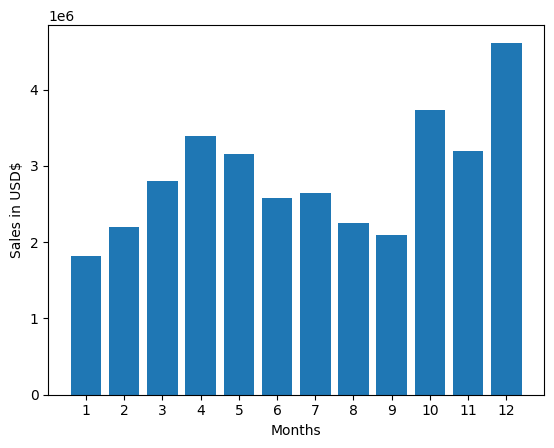

In [161]:
months = range(1, 13)
plt.bar(months, results1["Sales"])
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("Sales in USD$")
plt.show()

<Q2> Which city has the highest number of sales?

In [109]:
def getcity(x):
    l = x.split(",")
    return l[1] + l[2][:3]
res_data["City"] = res_data["Purchase Address"].apply(lambda x: getcity(x))

In [110]:
res_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City
0,176558,USB-C Charging Cable,2,11.953125,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.906250,04,Dallas TX
2,176559,Bose SoundSport Headphones,1,100.000000,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",100.000000,04,Boston MA
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.000000,04,Los Angeles CA
4,176560,Wired Headphones,1,11.992188,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.992188,04,Los Angeles CA
5,176561,Wired Headphones,1,11.992188,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.992188,04,Los Angeles CA


In [128]:
results2 = res_data.groupby("City").sum()

In [112]:
results2

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta GA,16602,2.779956e+06,2.795548e+06
Austin TX,11153,1.809905e+06,1.819614e+06
Boston MA,22528,3.637473e+06,3.661707e+06
Dallas TX,16730,2.752675e+06,2.768024e+06
Los Angeles CA,33289,5.421530e+06,5.452668e+06
New York City NY,27932,4.635452e+06,4.664400e+06
Portland ME,2750,4.471972e+05,4.497665e+05
Portland OR,11303,1.860590e+06,1.870765e+06
San Francisco CA,50239,8.211604e+06,8.262351e+06


In [113]:
results2.index.values

array([' Atlanta GA', ' Austin TX', ' Boston MA', ' Dallas TX',
       ' Los Angeles CA', ' New York City NY', ' Portland ME',
       ' Portland OR', ' San Francisco CA', ' Seattle WA'], dtype=object)

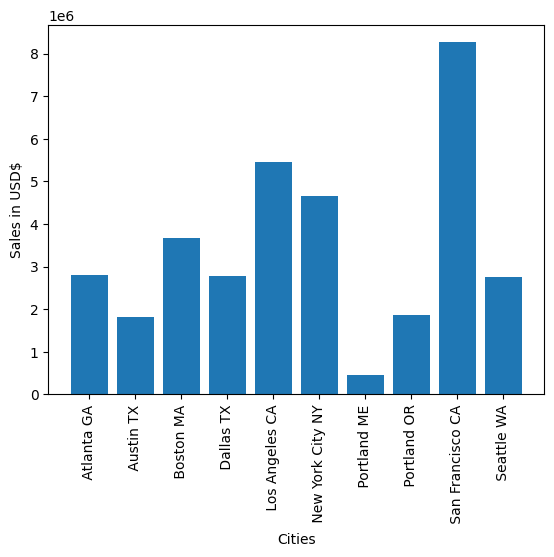

In [120]:
cities = results2.index.values
plt.bar(cities, results2["Sales"])
plt.xticks(cities, rotation = 'vertical')
plt.xlabel("Cities")
plt.ylabel("Sales in USD$")
plt.show()

<Q3> What time should we display advertisements to maximize likelihood of customer's buying product?

In [123]:
res_data["Hour"] = res_data["Order Date"].apply(lambda x: x[-5:-3])

In [124]:
res_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,Hour
0,176558,USB-C Charging Cable,2,11.953125,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.906250,04,Dallas TX,08
2,176559,Bose SoundSport Headphones,1,100.000000,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",100.000000,04,Boston MA,22
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.000000,04,Los Angeles CA,14
4,176560,Wired Headphones,1,11.992188,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.992188,04,Los Angeles CA,14
5,176561,Wired Headphones,1,11.992188,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.992188,04,Los Angeles CA,09


In [131]:
results3 = res_data.groupby('Hour').count()

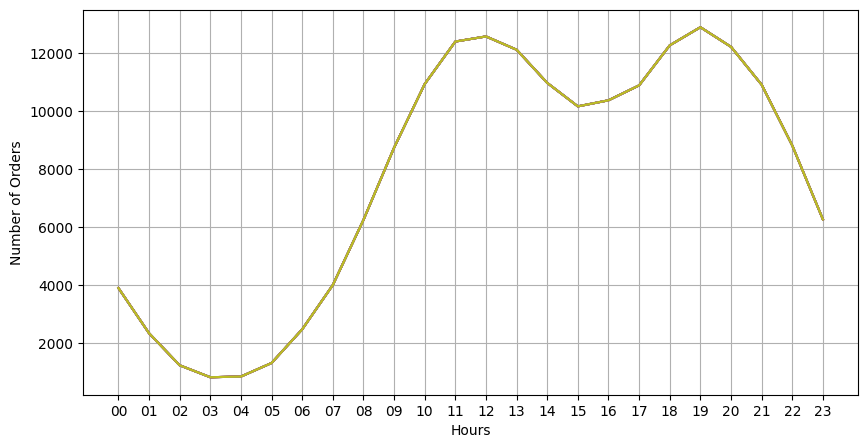

In [136]:
hours = results3.index.values
plt.figure(figsize=(10, 5))
plt.plot(hours, results3)
plt.xticks(hours)
plt.xlabel("Hours")
plt.ylabel("Number of Orders")
plt.grid()
plt.show()

What product are most often sold together?

In [172]:
products = np.unique(res_data["Product"].values)

In [173]:
result4 = pd.DataFrame(np.zeros((len(products), len(products))), index=products, columns=products)

In [174]:
grouped = res_data.groupby('Order ID')

In [175]:
for i, j in grouped:
    l = j["Product"].values
    n = len(l)
    if n > 1:
        for p in range(n):
            for q in range(p+1, n):
                result4[l[p]][l[q]] += 1
                result4[l[q]][l[p]] += 1
    

<Axes: >

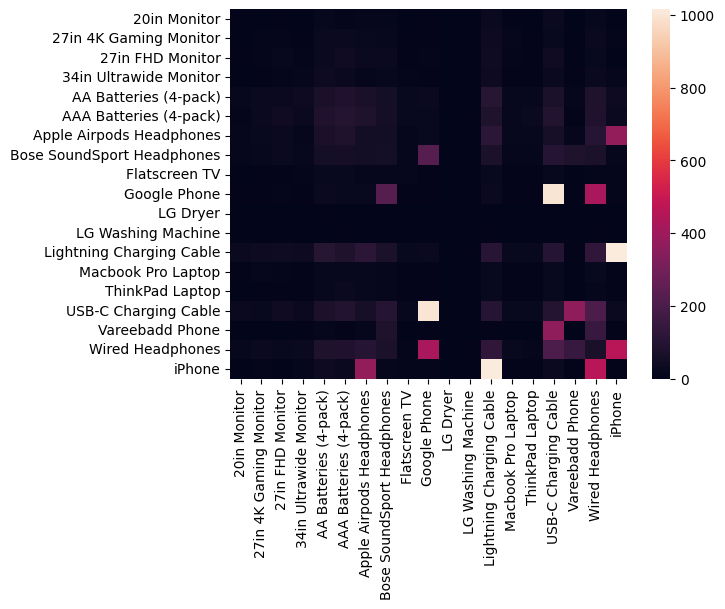

In [176]:
sns.heatmap(result4)

In [177]:
result4["Google Phone"]["USB-C Charging Cable"]

999.0

In [178]:
result4["iPhone"]["Lightning Charging Cable"]

1015.0